# Capstone ML Notebook – Contract Risk Classifier

This notebook demonstrates a basic pipeline for identifying risky clauses in contracts using natural language processing and classification techniques.

## Data Loading

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load synthetic dataset
df = pd.read_csv("/content/creative contracts.csv")
df.head()


,clause_text,risk_label
0,The artist grants exclusive worldwide rights t...,risky
1,"Royalties shall be paid quarterly, with 15% of...",safe
2,This agreement shall remain valid in perpetuit...,risky
3,The label shall have the right to audit the ar...,safe
4,All publishing rights are transferred to the l...,risky


## Data Preprocessing & Feature Engineering

We clean and prepare the contract clauses for modeling.

Missing values:
 clause_text    0
risk_label     0
dtype: int64


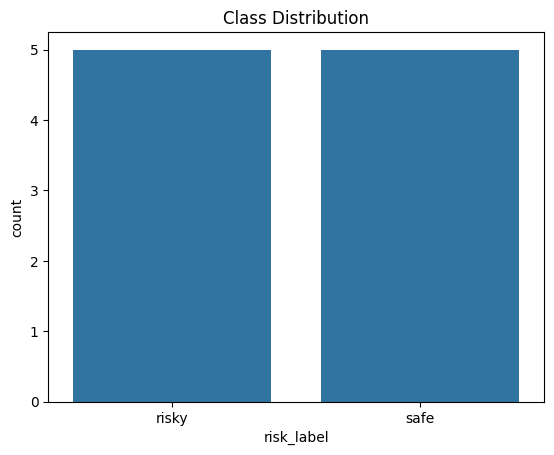

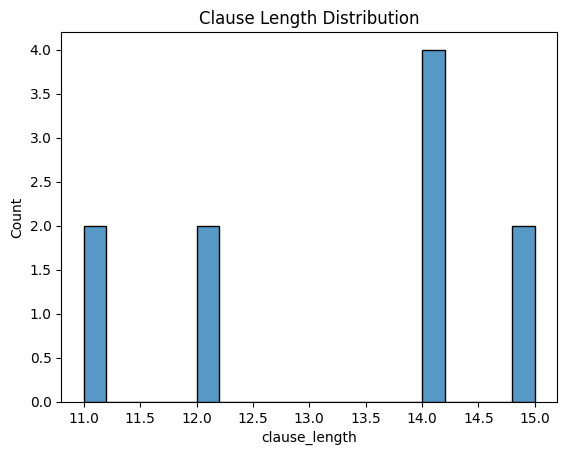

In [10]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with any nulls
df.dropna(inplace=True)

# Examine class balance
sns.countplot(x='risk_label', data=df)
plt.title('Class Distribution')
plt.show()

# Encode labels (0 = Safe, 1 = Risky)
df['label'] = df['risk_label'].map({'safe': 0, 'risky': 1})

# Display clause lengths
df['clause_length'] = df['clause_text'].apply(lambda x: len(x.split()))
sns.histplot(df['clause_length'], bins=20)
plt.title('Clause Length Distribution')
plt.show()


## Text Vectorization

We use TF-IDF to convert contract clauses into numerical features.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Remove empty or all-whitespace clauses
df = df[df['clause_text'].str.strip().astype(bool)]
df = df[df['clause_text'].str.split().str.len() > 2]



In [12]:

df = df[df['clause_text'].notnull()]
df = df[df['clause_text'].str.strip().astype(bool)]

df = df[df['clause_text'].str.split().str.len() > 2]
print(f"Remaining clauses after cleaning: {len(df)}")

# Only proceed if there's data left
if len(df) == 0:
    raise ValueError("No valid clauses left after filtering. Check your dataset!")

X = tfidf.fit_transform(df['clause_text'])
y = df['label']




Remaining clauses after cleaning: 10


## Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Model Training & Evaluation

We use Logistic Regression as a baseline classifier.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



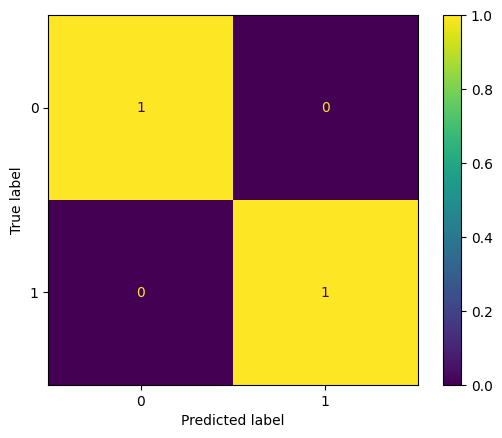

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


## Experiment Summary

| Model | Vectorizer | Accuracy | Notes |
|-------|------------|----------|-------|
| Logistic Regression | TF-IDF (1K features) | (See above) | Baseline model for clause risk detection |

## Conclusion

This notebook demonstrates a basic pipeline to classify risky clauses in contracts. Future work may include larger datasets, better label definitions, and fine-tuned transformers for context-aware classification.